<a href="https://colab.research.google.com/github/valentinaboriano/Computer-Vision/blob/main/Image_Colourization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Image Colourization Project 
by Valentina Boriano and Simone Vizzuso

In [1]:
#importing libraries
import os
import glob
import time
import numpy as np
from PIL import Image
from pathlib import Path
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from skimage.color import rgb2lab, lab2rgb

import torch
from torch import nn, optim
from torchvision import transforms
from torchvision.utils import make_grid
from torch.utils.data import Dataset, DataLoader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
use_colab = None

In [2]:
!pip install fastai==2.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###Downloading FastAI Dataset

In [3]:
from fastai.data.external import untar_data, URLs
dataset_path = untar_data(URLs.COCO_SAMPLE)
path = str(dataset_path) + "/train_sample"

In [109]:
images = glob.glob(path + "/*.jpg") # Take every image in the directory
np.random.seed(2022) # Set a seed to take everytime the same set of images

paths_subset = np.random.choice(images, 15_000, replace=False) # choosing 15000 images randomly
rand_idxs = np.random.permutation(15_000)

train_idxs = rand_idxs[:10000] # choosing the first 12000 as training set
val_idxs = rand_idxs[10000: 13000] # choosing  3000 as validation set
test_idxs = rand_idxs[13000:] # choosing last 2000 as test set

train_paths = paths_subset[train_idxs]
val_paths = paths_subset[val_idxs]
test_paths = paths_subset[test_idxs]

print(len(train_paths), len(val_paths), len(test_paths))

10000 3000 2000


####Showing some images

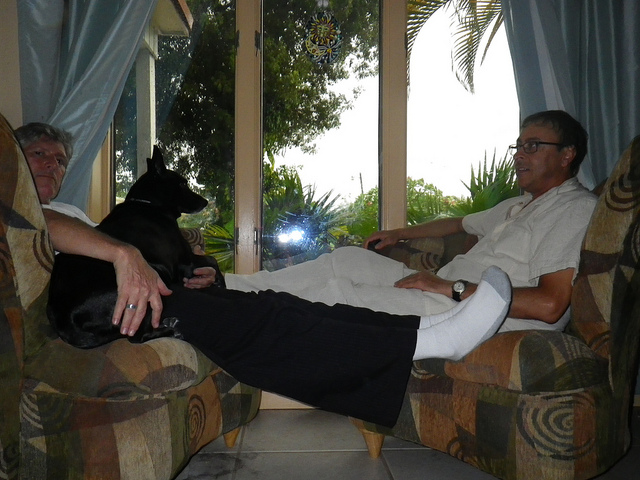

In [117]:
import PIL
img = PIL.Image.open(train_paths[0])
img

###Downloading Kaggle Dataset

In [5]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [12]:
! cp kaggle.json ~/.kaggle/

In [13]:
! chmod 600 ~/.kaggle/kaggle.json

In [21]:
! kaggle datasets download shravankumar9892/image-colorization

100% 2.09G/2.10G [00:18<00:00, 111MB/s] 
100% 2.10G/2.10G [00:18<00:00, 124MB/s]


In [22]:
! unzip image-colorization.zip

Archive:  image-colorization.zip
  inflating: ab/ab/ab1.npy           
  inflating: ab/ab/ab2.npy           
  inflating: ab/ab/ab3.npy           
  inflating: inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5  
  inflating: l/gray_scale.npy        


####Showing some images

In [30]:
img_array_g = np.load('l/gray_scale.npy')
img_array_ab = np.load('ab/ab/ab1.npy')

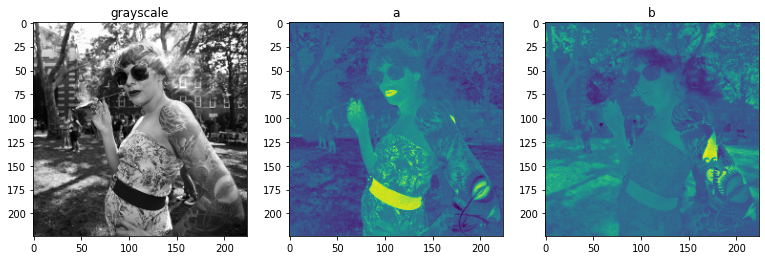

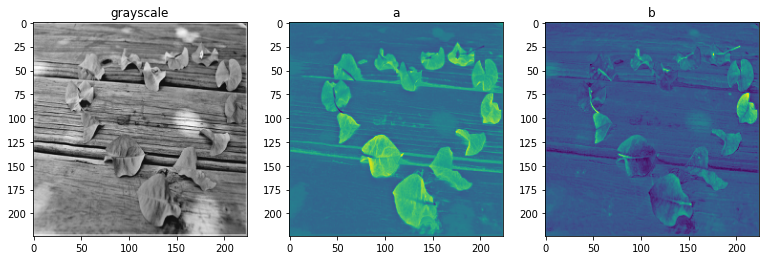

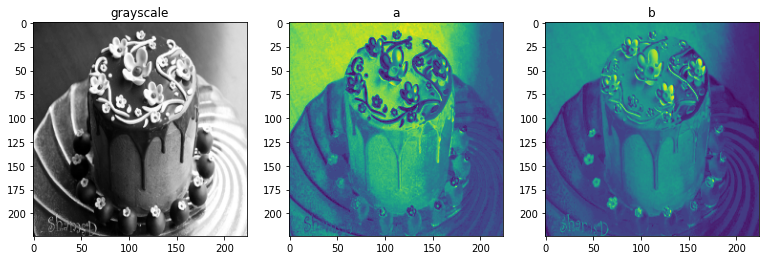

In [89]:
for i in range(0,3):
  fig = plt.figure(figsize=(13,13))
  ax1 = fig.add_subplot(1,3,1)
  ax1.set_title("grayscale")
  ax1.imshow(img_array_g[i], cmap='gray')
  ax2 = fig.add_subplot(1,3,2)
  ax2.set_title("a")
  ax2.imshow(img_array_ab[i,:,:,0])
  ax3 = fig.add_subplot(1,3,3)
  ax3.set_title("b")
  ax3.imshow(img_array_ab[i,:,:,1])
